In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from plots_utils import make_scatter_line_plots, make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot, make_line_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# model version = V8

# Annual pumping vs net GW (in AF) comparison for all basins

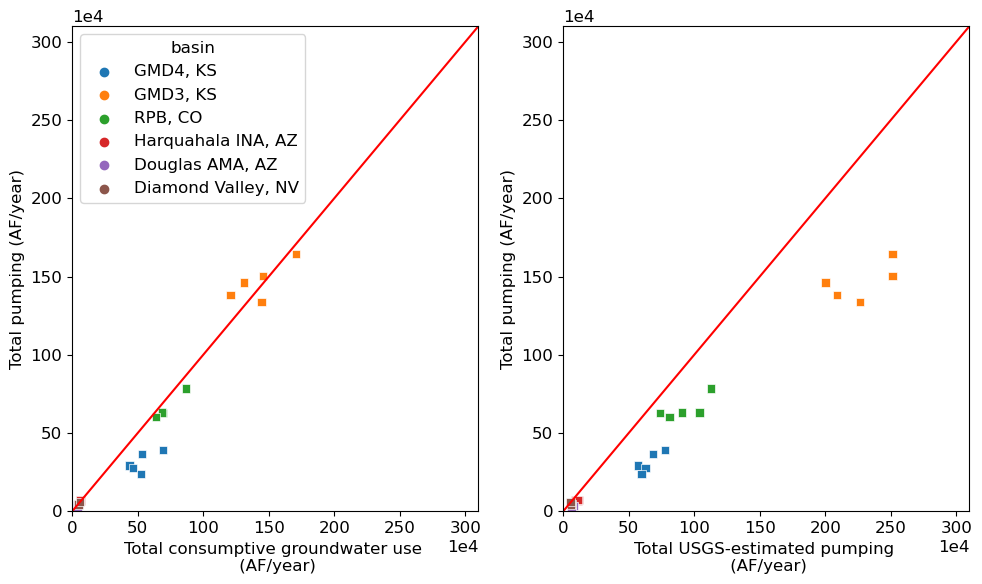

In [11]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')

plot_save_path = './plots/all_total_AF_comparison.png'

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df, x1='netGW_AF', y1='pumping_AF', hue='basin', 
                                               xlabel1='Total consumptive groundwater use \n (AF/year)', 
                                               ylabel1='Total pumping (AF/year)', 
                                               fontsize=12, lim=(0, 3100000),
                                               scientific_ticks=True,
                                               x2='USGS_AF', 
                                               y2='pumping_AF', 
                                               xlabel2='Total USGS-estimated pumping \n (AF/year)', 
                                               ylabel2='Total pumping (AF/year)',
                                               figsize=(10, 6), savepath=plot_save_path)

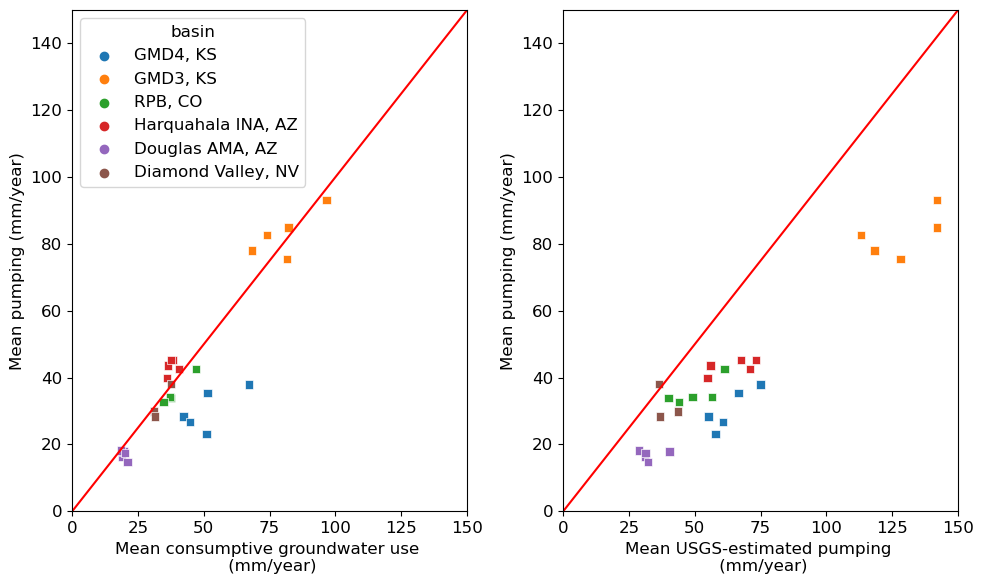

In [12]:
plot_save_path = './plots/all_mean_mm_comparison.png'

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df, x1='mean netGW_mm', y1='mean pumping_mm', hue='basin', 
                                               xlabel1='Mean consumptive groundwater use \n (mm/year)', 
                                               ylabel1='Mean pumping (mm/year)', 
                                               fontsize=12, lim=(0, 150),
                                               scientific_ticks=False,
                                               x2='mean USGS_mm', 
                                               y2='mean pumping_mm', 
                                               xlabel2='Mean USGS-estimated pumping \n (mm/year)', 
                                               ylabel2='Mean pumping (mm/year)',
                                               figsize=(10, 6), savepath=plot_save_path)

------------

# GMD4, Kansas

In [2]:
gmd4_df = pd.read_csv('../../Data_main/results_eval/netGW/gmd4/gmd4_netGW_pumping.csv')
gmd4_annual = pd.read_csv('../../Data_main/results_eval/netGW/gmd4/gmd4_annual.csv')

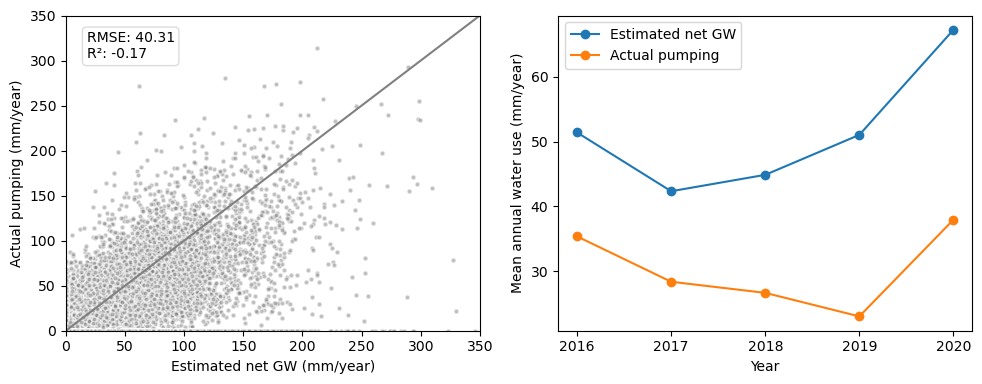

In [3]:
make_scatter_line_plots(x1=gmd4_df.netGW_mm, y1=gmd4_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 350), 
                        make_line_plot=True, 
                        x2=gmd4_annual['mean netGW_mm'], y2=gmd4_annual['mean pumping_mm'],
                        year=gmd4_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping')

-------------------

# GMD3, Kansas

In [4]:
gmd3_df = pd.read_csv('../../Data_main/results_eval/netGW/gmd3/gmd3_netGW_pumping.csv')
gmd3_annual = pd.read_csv('../../Data_main/results_eval/netGW/gmd3/gmd3_annual.csv')

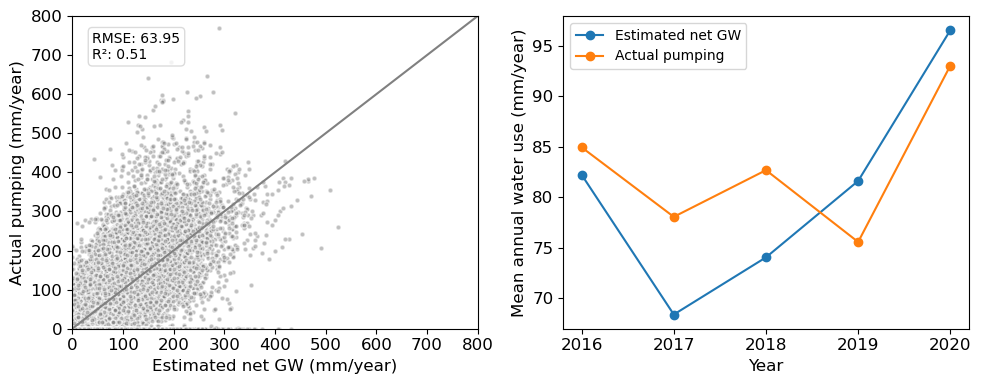

In [5]:
make_scatter_line_plots(x1=gmd3_df.netGW_mm, y1=gmd3_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 800), 
                        make_line_plot=True, 
                        x2=gmd3_annual['mean netGW_mm'], y2=gmd3_annual['mean pumping_mm'],
                        year=gmd3_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping')

### netGW conversion to pumping

R2:  0.47025774969471223
RMSE:  66.24554382308958


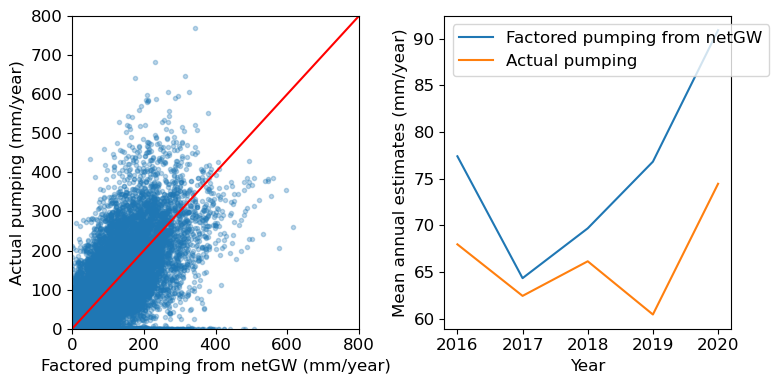

In [21]:
gmd3_df['factored_pumping'] = gmd3_df['netGW_mm'] /0.85

r2 = r2_score(gmd3_df.pumping_mm, gmd3_df.factored_pumping)
print('R2: ', r2)

rmse = mean_squared_error(gmd3_df.pumping_mm, gmd3_df.factored_pumping, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(gmd3_df.factored_pumping, gmd3_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Factored pumping from netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean in mm/year
yearly_mean = gmd3_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.factored_pumping, label='Factored pumping from netGW')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

plt.tight_layout()

---------

# RPB, Colorado

In [6]:
rpb_df = pd.read_csv('../../Data_main/results_eval/netGW/rpb/rpb_netGW_pumping.csv')
rpb_annual = pd.read_csv('../../Data_main/results_eval/netGW/rpb/rpb_annual.csv')

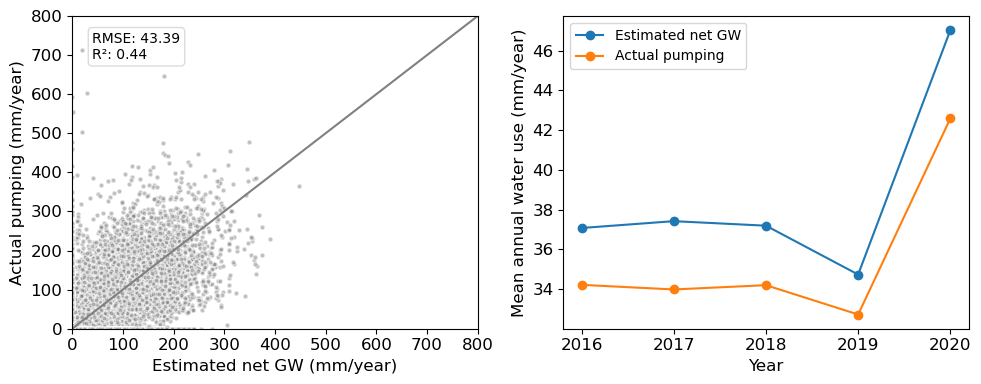

In [7]:
make_scatter_line_plots(x1=rpb_df.netGW_mm, y1=rpb_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 800), 
                        make_line_plot=True, 
                        x2=rpb_annual['mean netGW_mm'], y2=rpb_annual['mean pumping_mm'],
                        year=rpb_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping')

________________

# Harquahala INA, Arizona

In [10]:
hqr_df = pd.read_csv('../../Data_main/results_eval/netGW/hqr/hqr_netGW_pumping.csv')
hqr_annual = pd.read_csv('../../Data_main/results_eval/netGW/hqr/hqr_annual.csv')

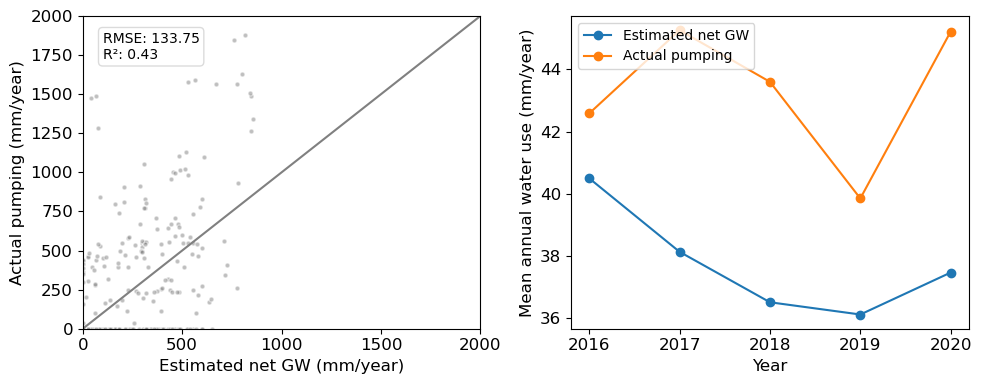

In [11]:
make_scatter_line_plots(x1=hqr_df.netGW_mm, y1=hqr_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 2000), 
                        make_line_plot=True, 
                        x2=hqr_annual['mean netGW_mm'], y2=hqr_annual['mean pumping_mm'],
                        year=rpb_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping')

### efficiency

In [12]:
hqr_annual['efficiency'] =  hqr_annual['netGW_mm']  / hqr_annual['pumping_mm']
hqr_annual

,year,netGW_mm,pumping_mm,pumping_AF,netGW_AF,USGS_AF,mean netGW_mm,mean pumping_mm,mean USGS_mm,efficiency
0,2016,16695.031003,17555.387440,68447.0803,65092.681618,114215.355978,40.496755,42.583702,71.058001,0.950992
1,2017,15720.919928,18657.687050,72744.8600,61294.695752,117823.145962,38.133876,45.257525,73.302553,0.842597
2,2018,15052.725896,17973.539200,70077.4197,58689.456992,89943.659175,36.513053,43.598003,55.957595,0.837494
3,2019,14890.469774,16428.403667,64053.0582,58056.832273,88154.473755,36.119472,39.850003,54.844470,0.906386
4,2020,15446.617576,18639.860434,72675.3553,60225.211053,108660.595064,37.468507,45.214283,67.602159,0.828687


------------------

# Douglas AMA, Arizona

In [14]:
doug_df = pd.read_csv('../../Data_main/results_eval/netGW/doug/doug_netGW_pumping.csv')
doug_annual = pd.read_csv('../../Data_main/results_eval/netGW/doug/doug_annual.csv')

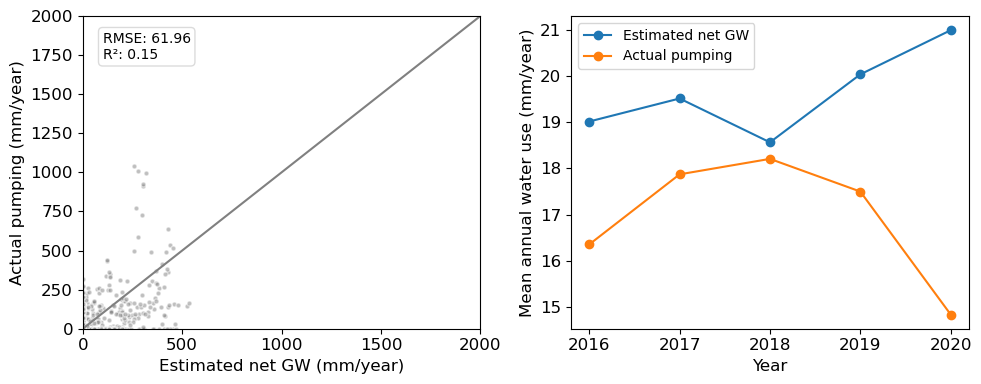

In [15]:
make_scatter_line_plots(x1=doug_df.netGW_mm, y1=doug_df.pumping_mm,
                        fontsize=12, facecolor='gray', edgecolor='white', marker_size=12, alpha=0.5,
                        xlabel_scatter='Estimated net GW (mm/year)', ylabel_scatter='Actual pumping (mm/year)',
                        x_y_lim_scatter=(0, 2000), 
                        make_line_plot=True, 
                        x2=doug_annual['mean netGW_mm'], y2=doug_annual['mean pumping_mm'],
                        year=doug_annual.year, xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)',
                        line_label_1='Estimated net GW', line_label_2='Actual pumping')

### efficiency

In [16]:
doug_annual['efficiency'] =  doug_annual['netGW_mm']  / doug_annual['pumping_mm']
doug_annual

,year,netGW_mm,pumping_mm,pumping_AF,netGW_AF,USGS_AF,mean netGW_mm,mean pumping_mm,mean USGS_mm,efficiency
0,2016,9722.518488,8363.943484,32610.360040,37907.375243,61772.584509,19.014107,16.357173,30.984780,1.162432
1,2017,9976.979988,9138.680801,35631.000025,38899.501816,80465.699401,19.511751,17.872309,40.361142,1.091731
2,2018,9492.497375,9309.604911,36297.420000,37010.540069,57395.744454,18.564260,18.206581,28.789382,1.019646
3,2019,10243.740016,8948.269149,34888.600200,39939.579061,62476.518780,20.033448,17.499925,31.337870,1.144773
4,2020,10731.657123,7589.396006,29590.460080,41841.931459,64089.399874,20.987656,14.842408,32.146882,1.414033


----------

# Diamod Valley, Nevada

In [17]:
dv_df = pd.read_csv('../../Data_main/results_eval/netGW/dv/dv_annual.csv')
dv_df

,year,netGW_AF,pumping_AF,USGS_AF,mean netGW_mm,mean pumping_mm,mean USGS_mm
0,2018,48707.091926,46854.596518,68292.116647,31.071573,29.889816,43.565390
1,2019,49482.388300,44531.918956,57805.644837,31.566155,28.408117,36.875786
2,2020,58735.461290,59623.316935,57103.653665,37.468941,38.035328,36.427967


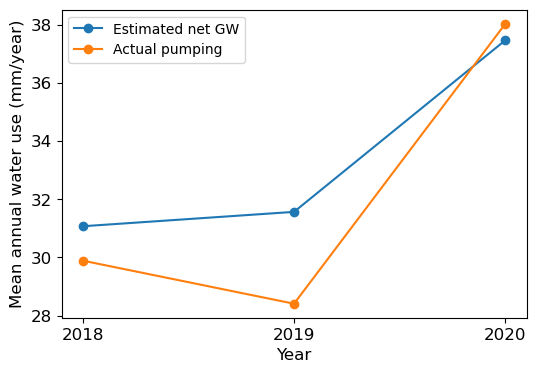

In [18]:
make_line_plot(x=dv_df['mean netGW_mm'], y=dv_df['mean pumping_mm'], 
               fontsize=12, year= dv_df['year'], 
               xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)', 
               line_label_1='Estimated net GW', line_label_2='Actual pumping')

----------------

# Harney Basin, OR

In [32]:
hrn_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Harney_Basin_OR/OR_Harney_Basin_annual.csv')
hrn_df

,year,netGW_AF,area_irrig,pumping_AF,mean netGW_mm,mean pumping_mm
0,2016,24052.342688,6.692286e+13,9745.275173,443.318283,785.809505
1,2017,29340.259515,8.153504e+13,8041.356017,443.866561,648.414117
2,2018,29085.508999,8.035820e+13,9695.555198,446.456606,781.800339
3,2019,28806.725194,8.705127e+13,8300.565889,408.179823,669.315485
4,2020,29771.992434,8.213663e+13,8144.835966,447.099068,656.758214


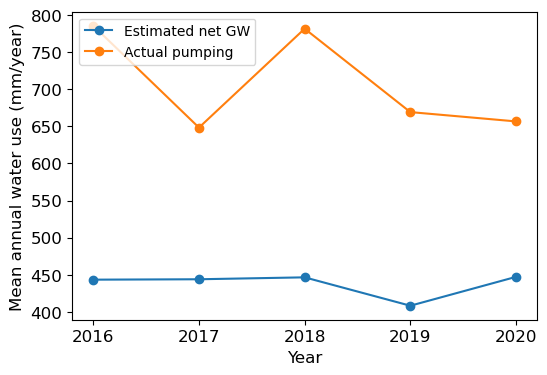

In [33]:
make_line_plot(x=hrn_df['mean netGW_mm'], y=hrn_df['mean pumping_mm'], 
               fontsize=12, year= hrn_df['year'], 
               xlabel_line='Year', ylabel_line='Mean annual water use (mm/year)', 
               line_label_1='Estimated net GW', line_label_2='Actual pumping')

-----------